In [2]:
from contract_v01 import VanillaOption
from sde_1d_v01 import Gbm_1d

import numpy as np
from scipy.fftpack import fft, ifft

In [3]:
'''===========
paras
========'''
s0 = 100 
r = .05 
sigma = .3
T = 1
K = 90
otype = 1


In [4]:
'''===============
Test bsm_price
================='''
gbm1 = Gbm_1d(init_state=s0, drift_ratio=r, vol_ratio=sigma)
option1 = VanillaOption(otype = otype, strike = K, maturity= T) 

print('>>>>>>>>>> exact call value is ' + str(gbm1.bsm_price(option1)))   


>>>>>>>>>> exact call value is 19.69744208683972


Next, we use FFT to recover the result on the page 44 of [Hir13] for the above model.

In [5]:
'''=============
FFT paras
================='''
alpha = 1
N = 2**8
eta = 0.1

In [6]:
'''============
step 1. set Phi(t), the characteristic function of the terminal stock price
================'''
Phi = lambda t: np.exp(1j*t*(r-sigma**2/2)-.5*sigma**2*t**2)

In [25]:
lamda = 2*np.pi/N/eta
nu = np.arange(N)*eta
c = np.exp(-r*T)
beta = np.log(s0) - lamda*N/2
k_arr = np.arange(N)*lamda + beta

In [22]:
x = []
for k in range(N):
    x.append(eta*c/(alpha+1j*nu[k])/(alpha+1j*nu[k]+1)*np.exp(-1j*beta*nu[k])*Phi(nu[k]- (alpha+1)*1j))
x[0] = x[0]/2

In [26]:
y = fft(x)

In [27]:
call_fft = [np.exp(-alpha*k_arr[k])*y[k].real for k in range(N)]

In [28]:
call_fft[int(N/2)]

8.673617379884016e-19

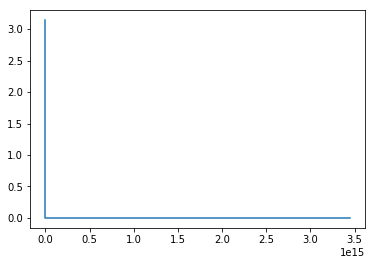

In [30]:
import matplotlib.pyplot as plt
plt.plot(np.exp(k_arr), call_fft)

In [66]:
'''============
step 2. determine characteristic function of the modified call
=============='''
c = np.exp(-r*T)
Psi = lambda nu: c/(alpha + nu*1j)/(alpha + 1j*nu+1)*Phi(nu-(alpha+1)*1j)

In [47]:
'''=========
step 3. set other parameters
============'''
lamda = 2*np.pi/N/eta
beta = np.log(s0) - lamda*N/2
k_arr = np.arange(N)*lamda + beta

In [79]:
'''=============
step 4. set discrete points for fft 
==============='''
nu = np.arange(N)*eta
w = 2*np.ones(N); w[0] = 1; w = w*eta/2
x = [np.exp(-1j*beta*nu[j])*Psi(nu[j])*w[j] for j in np.arange(N)]

In [80]:
call_fft = ifft(x)

In [81]:
np.exp(k_arr[int(N/2)])

100.00000000000023

In [82]:
call_fft[int(N/2)].real

4.87890977618477e-19

In [19]:
tmp = np.zeros(5)
tmp[0]

0.0

In [20]:
x

(3.028546679035096e-17+1.6563219027517557e-17j)